<a href="https://colab.research.google.com/github/chaitykundu/DistilBERT_Emotion_Recognition/blob/main/DistilBert_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install transformers datasets bertviz umap_learn transformers

In [21]:
from datasets import load_dataset

ds = load_dataset("dair-ai/emotion")

In [22]:
import pandas as pd

In [23]:
all_datasets = load_dataset("dair-ai/emotion") # Example: Loading the same dataset as before, or another dataset of your choice.
all_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [24]:
len(all_datasets)

3

In [25]:
'dair-ai/emotion' in all_datasets

False

In [30]:
from datasets import load_dataset

emotion = load_dataset('emotion')
emotion.set_format(type='pandas')

In [33]:
df=emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [38]:
emotion['train'].features['label'].names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [39]:
df['label_name'] = df['label'].apply(lambda x: emotion['train'].features['label'].int2str(x))
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


Dataset Analylist : Used for understand about dataset, class distribution and mostly data distribution

In [41]:
import matplotlib.pyplot as plt

label_counts = df['label_name'].value_counts()
label_counts

,count
label_name,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


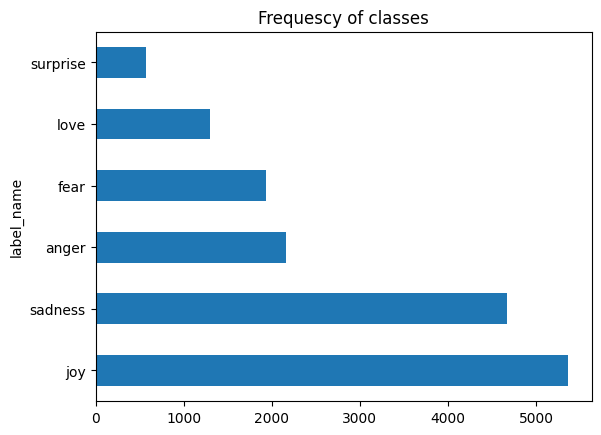

In [44]:
label_counts.plot(kind='barh')
plt.title('Frequescy of classes')
plt.show()

<Axes: title={'center': 'words per tweet'}, xlabel='label_name'>

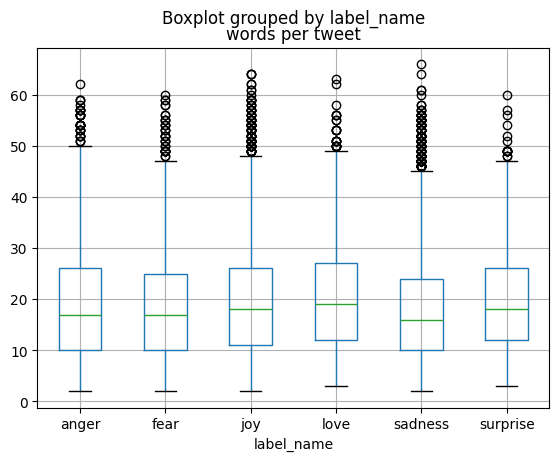

In [48]:
df['words per tweet'] = df['text'].str.split().apply(len)
df.boxplot("words per tweet", by='label_name')

In [54]:
from transformers import AutoTokenizer
model_ckpt = "distilbert/distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [61]:
text= "Machine learning is the part of Artificial Intrelligent."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 3698, 4083, 2003, 1996, 2112, 1997, 7976, 20014, 22948, 11461, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [62]:
tokens= tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'machine', 'learning', 'is', 'the', 'part', 'of', 'artificial', 'int', '##relli', '##gent', '.', '[SEP]']


In [64]:
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

In [65]:
emotion.reset_format()

In [71]:
#map

def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)
  return temp

print(tokenize(emotion["train"][:1]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1]]}


In [72]:
emotions_encoded = emotion.map(tokenize, batched=True, batch_size=None)
emotions_encoded

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

#Model Building

In [73]:
text

'Machine learning is the part of Artificial Intrelligent.'

In [74]:
inputs= tokenizer(text, return_tensors="pt")
inputs

{'input_ids': tensor([[  101,  3698,  4083,  2003,  1996,  2112,  1997,  7976, 20014, 22948,
         11461,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [76]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [79]:
with torch.no_grad():
  outputs = model(**inputs)
last_hidden_states =outputs.last_hidden_state
last_hidden_states

tensor([[[-0.2788, -0.1486, -0.3283,  ..., -0.2262, -0.0388,  0.5675],
         [ 0.0686,  0.1330, -0.3925,  ..., -0.2651,  0.4352,  0.3737],
         [-0.3569, -0.0054, -0.6953,  ..., -0.6069, -0.1491,  0.2885],
         ...,
         [ 0.2822, -0.1494,  0.0360,  ..., -0.3513, -0.2960,  0.4947],
         [ 0.8620,  0.0817, -0.5684,  ...,  0.1766, -0.6390, -0.1817],
         [ 0.7122,  0.2437, -0.2824,  ...,  0.1104, -0.7070,  0.0095]]])

In [80]:
last_hidden_states.shape

torch.Size([1, 13, 768])

In [81]:
from transformers import AutoModelForSequenceClassification

num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt)

NameError: name 'num' is not defined

In [ ]:
_